In [1]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [9]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [ ]:
X_train,Y_train

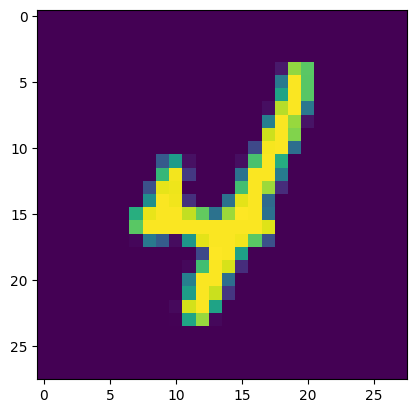

In [14]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[363])

In [ ]:
X_train=X_train/255
X_test=X_test/255
X_train

In [31]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')


In [36]:
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=25)

Epoch 1/25
1500/1500 [==============================] - 7s 5ms/step - loss: 1.9628 - val_loss: 1.9324
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 1.9131 - val_loss: 1.8868
Epoch 3/25
1500/1500 [==============================] - 10s 6ms/step - loss: 1.8746 - val_loss: 1.8637
Epoch 4/25
1500/1500 [==============================] - 11s 7ms/step - loss: 1.8433 - val_loss: 1.8246
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 1.8148 - val_loss: 1.7903
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 1.7898 - val_loss: 1.7649
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 1.7670 - val_loss: 1.7569
Epoch 8/25
1500/1500 [==============================] - 7s 5ms/step - loss: 1.7478 - val_loss: 1.7224
Epoch 9/25
1500/1500 [==============================] - 7s 5ms/step - loss: 1.7287 - val_loss: 1.7018
Epoch 10/25
1500/1500 [==============================] - 7s 5ms/step - loss: 1.7

In [37]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([7, 0, 1, ..., 7, 6, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.3758

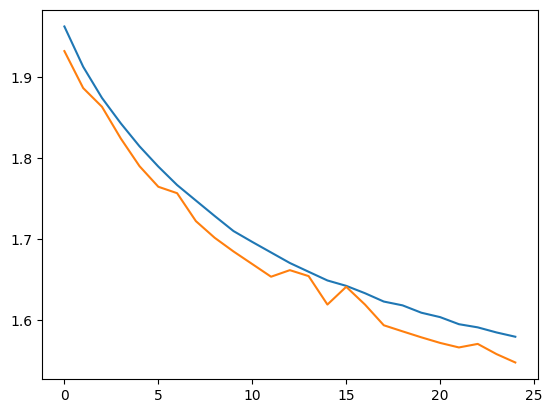

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])